<a href="https://colab.research.google.com/github/DrakeData/Digit_Recognizer/blob/main/Digit_Recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 6: Digit Recognizer

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from datetime import datetime
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans
from sklearn import metrics

## Ingest
Donwloading the data from Kaggle's API

In [2]:
! pip install kaggle

In [3]:
! mkdir ~/.kaggle

In [4]:
! cp './drive/MyDrive/Colab Notebooks/API Keys/kaggle.json' ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle competitions download digit-recognizer

 55% 5.00M/9.16M [00:00<00:00, 34.6MB/s]
100% 9.16M/9.16M [00:00<00:00, 44.6MB/s]
  0% 0.00/235k [00:00<?, ?B/s]
100% 235k/235k [00:00<00:00, 161MB/s]
 33% 2.00M/6.09M [00:00<00:00, 18.4MB/s]
100% 6.09M/6.09M [00:00<00:00, 28.9MB/s]


In [7]:
! unzip test.csv.zip

Archive:  test.csv.zip
  inflating: test.csv                


In [8]:
! unzip train.csv.zip

Archive:  train.csv.zip
  inflating: train.csv               


## EDA

In [9]:
test_df = pd.read_csv('/content/test.csv')
train_df = pd.read_csv('/content/train.csv')

train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [11]:
train_df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.00000,42000.000000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,...,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00300,0.011190,0.005143,0.000214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000381,0.001310,0.010548,0.027262,0.050905,0.066405,0.129571,...,3.772524,2.748905,1.796452,1.089905,0.563190,0.239571,0.093524,0.024833,0.000857,0.001405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006143,0.035833,0.082357,0.114905,0.178714,0.301452,0.413643,0.513667,0.558833,0.677857,0.60281,0.489238,0.340214,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.56812,1.626927,1.053972,0.043916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.078072,0.232634,1.131661,2.310396,3.121847,3.259128,4.992894,...,26.957829,22.879248,18.595109,14.434439,10.517823,6.469315,3.976306,1.846016,0.139556,0.287891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.949803,2.350859,3.934280,4.543583,5.856772,7.219742,8.928286,10.004069,10.129595,11.254931,10.69603,9.480066,7.950251,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [12]:
train_df.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

To improve the model’s accuracy, we will want to normalize the data. This will also help us from exploding gradients due to the high numeric pixel values (which is in a range from 0 to 255). We will divide the values by 255.

In [13]:
x = train_df.drop('label', axis=1)
y = train_df['label']

# Scale Data
x_s = x/255

In [14]:
# split data into 80% train & 20% test set
x_train, x_test, y_train, y_test = train_test_split(x_s, y, test_size=0.2, 
                                                    random_state=0)

In [15]:
y_train.value_counts()

1    3723
7    3502
3    3488
9    3376
0    3319
2    3317
6    3296
8    3295
4    3245
5    3039
Name: label, dtype: int64

## Models

### Random Forest Classifier

In [16]:
r_forest = RandomForestClassifier()

# number of trees used
print(f'Number of Trees used : {r_forest.n_estimators}')

Number of Trees used : 100


In [17]:
start = datetime.now()

# Fit the model
r_forest.fit(x_train, y_train)
end = datetime.now()
print(f"Total elapsed time = {end-start}")

# Predict
rf_pred = r_forest.predict(x_test)

Total elapsed time = 0:00:29.241250


In [18]:
# Check accuracy
acc = accuracy_score(y_test, rf_pred)
print(f'Accuracy score = {acc}')
print(f'Classification Report {classification_report(y_test, rf_pred)}')

Accuracy score = 0.964047619047619
Classification Report               precision    recall  f1-score   support

           0       0.97      0.98      0.98       813
           1       0.99      0.99      0.99       961
           2       0.95      0.97      0.96       860
           3       0.96      0.95      0.95       863
           4       0.97      0.96      0.97       827
           5       0.96      0.96      0.96       756
           6       0.97      0.98      0.98       841
           7       0.97      0.96      0.97       899
           8       0.94      0.94      0.94       768
           9       0.95      0.94      0.95       812

    accuracy                           0.96      8400
   macro avg       0.96      0.96      0.96      8400
weighted avg       0.96      0.96      0.96      8400



In [19]:
test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
holdout_df = test_df

# Standardize the data
ss_holdout = holdout_df/255

# predict ImageId
predict = r_forest.predict(ss_holdout)

result = pd.Series(predict,name="Label")

submit = pd.concat([pd.Series(range(1,28001), name="ImageId"), result], axis = 1)

#export to csv
submit.to_csv('./drive/MyDrive/Colab Notebooks/Digit_Recognizer/rf_submission.csv', index=False)

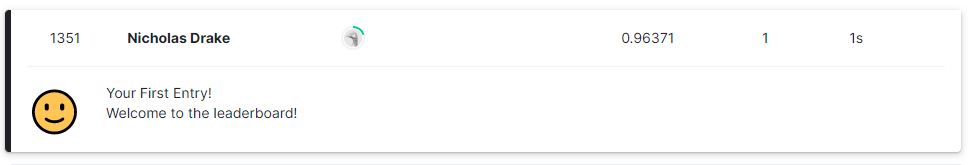

The Random Forest Classifier had a high accuracy score of .96 and good precision, recall, and F-1 scores. It takes about 23 seconds to run.

### Principal Components Analysis (PCA)

In [21]:
pca = PCA()

start = datetime.now()
xproj = pca.fit(x_s)
end = datetime.now()
print(f"Total elapsed time = {end-start}")
print(pca.components_.shape)
print(f"Principal components count: {pca.n_components_}")

Total elapsed time = 0:00:07.442608
(784, 784)
Principal components count: 784


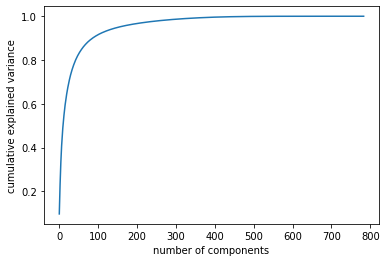

In [22]:
#Explained variance plot
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [23]:
pca2 = PCA(.95)

start = datetime.now()
pca2.fit(x_train)
end = datetime.now()
print(f"Total elapsed time = {end-start}")

x_train_pca = pca2.transform(x_train)
x_test_pca = pca2.transform(x_test)

Total elapsed time = 0:00:05.941592


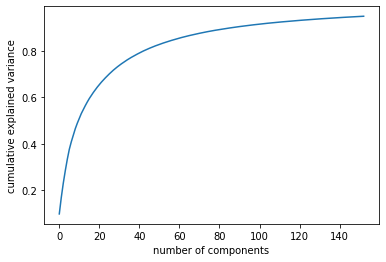

In [24]:
#Explained variance plot
plt.plot(np.cumsum(pca2.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

### Random Forest Using PCA

In [25]:
start = datetime.now()
r_forest2 = RandomForestClassifier()
r_forest2.fit(x_train_pca, y_train)
end = datetime.now()
print(f"Total elapsed time = {end-start}")

# Predict
rf_pred2 = r_forest2.predict(x_test_pca)

Total elapsed time = 0:00:55.965754


In [26]:
# Check accuracy
acc2 = accuracy_score(y_test, rf_pred2)
print(f'Accuracy score = {acc2}')
print(f'Classification Report {classification_report(y_test, rf_pred2)}')

Accuracy score = 0.9397619047619048
Classification Report               precision    recall  f1-score   support

           0       0.96      0.97      0.96       813
           1       0.98      0.98      0.98       961
           2       0.93      0.94      0.94       860
           3       0.91      0.91      0.91       863
           4       0.94      0.93      0.94       827
           5       0.93      0.94      0.93       756
           6       0.95      0.98      0.96       841
           7       0.95      0.95      0.95       899
           8       0.91      0.89      0.90       768
           9       0.92      0.89      0.91       812

    accuracy                           0.94      8400
   macro avg       0.94      0.94      0.94      8400
weighted avg       0.94      0.94      0.94      8400



In [27]:
holdout_df2 = test_df

# Standardize the data
ss_holdout = holdout_df2/255

x_test_pca = pca2.transform(ss_holdout)

# predict ImageId
predict2 = r_forest2.predict(x_test_pca)

result2 = pd.Series(predict,name="Label")

submit2 = pd.concat([pd.Series(range(1,28001),name ="ImageId"), result2], axis=1)

#export to csv
submit2.to_csv('./drive/MyDrive/Colab Notebooks/Digit_Recognizer/rf2_submission.csv', index=False)

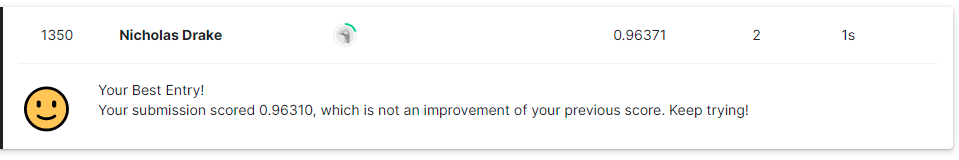

Using the Random Forest Classifier with PCA took about 2x as long compared to just using the Random Forest. It was close in performance with the accuracy score of .94, which is .02 lower than the previous model.

### K-Means Clustering
K-Means clustering looks at partition n observations into k clusters to identify which cluster each observation belongs in. We will be using Mini Batch K-Means which is similar to K-Means, but preforms better as the computationally costly step is conducted on only a random sample of observations instead of all observations.

In [28]:
total_clusters = len(np.unique(y_test))

# Initialize the K-Means model
kmeans = MiniBatchKMeans(n_clusters=total_clusters)
# Fitting the model to training set
kmeans.fit(x_train)
kmeans.labels_

array([9, 3, 9, ..., 2, 3, 2], dtype=int32)

The below function associates most probable label with each cluster in KMeans model and returns the dictionary of clusters assigned to each label

In [29]:
def retrieve_info(cluster_labels, y_train):
  # Initializing
  reference_labels = {}
  
  # For loop to run through each label of cluster label
  for i in range(len(np.unique(kmeans.labels_))):
    index = np.where(cluster_labels == i,1,0)
    num = np.bincount(y_train[index==1]).argmax()
    reference_labels[i] = num
  return reference_labels

In [30]:
reference_labels = retrieve_info(kmeans.labels_, y_train)
number_labels = np.random.rand(len(kmeans.labels_))

for i in range(len(kmeans.labels_)):
  number_labels[i] = reference_labels[kmeans.labels_[i]]

predicted 'number_label' and the actual label for the first 10 training examples

In [31]:
# Comparing Predicted values and Actual values
print(number_labels[:10].astype(int))
print(y_train[:10])

[4 0 4 4 2 2 4 1 3 1]
39317    6
32837    6
16644    4
20005    4
1533     2
41842    2
7781     3
28433    1
5554     3
31233    3
Name: label, dtype: int64


Check accuracy score

In [32]:
acc4 = accuracy_score(number_labels, y_train)
print(f'Accuracy score = {acc4}')

Accuracy score = 0.5769047619047619


The accuracy score is low compared to our previous models, in which we would want to analyze. One issue that can be causing this is that I used the wrong cluster (k) value. I will try looping through different cluster amounts and look at the different Inertia, Homogeneity, and Accuracy scores.
-	**Inertia**: measures internal coherent clusters. The higher the number of clusters, the lower this score will be.
-	**Homogeneity**: measures the data points of a specific cluster belonging to a specific class. The closer to 1, the closer the cluster labeling is given a ground truth.
-	**Accuracy**: measures the accuracy classification score of the model. The closer to 1, the more accurate the model is.


In [33]:
# Function to calculate metrics for the model
def calculate_metrics(model, output):
  print(f'Number of clusters is {model.n_clusters}')
  print(f'Inertia : {model.inertia_}')
  print(f'Homogeneity : {metrics.homogeneity_score(output,model.labels_)}')

In [34]:
cluster_number = [10,16,36,64,144,256]

for i in cluster_number:
  total_clusters = len(np.unique(y_test))
  # Initialize the K-Means model
  
  kmeans = MiniBatchKMeans(n_clusters=i)
  # Fitting the model to training set
  kmeans.fit(x_train)
  # Calculating the metrics
  calculate_metrics(kmeans, y_train)
  # Calculating reference_labels
  reference_labels = retrieve_info(kmeans.labels_, y_train)
  # ‘number_labels’ is a list which denotes the number displayed in image
  number_labels = np.random.rand(len(kmeans.labels_))
  
  for i in range(len(kmeans.labels_)):
    number_labels[i] = reference_labels[kmeans.labels_[i]]
  print('Accuracy score : {}'.format(accuracy_score(number_labels, y_train)))
  print('\n')

Number of clusters is 10
Inertia : 1338409.0055502327
Homogeneity : 0.47398209482108383
Accuracy score : 0.58375


Number of clusters is 16
Inertia : 1253770.7826859003
Homogeneity : 0.5111566294221688
Accuracy score : 0.587202380952381


Number of clusters is 36
Inertia : 1096086.0973021137
Homogeneity : 0.6758530528696244
Accuracy score : 0.7482142857142857


Number of clusters is 64
Inertia : 1008599.3337652793
Homogeneity : 0.7370742749106668
Accuracy score : 0.8006845238095238


Number of clusters is 144
Inertia : 906982.6526932667
Homogeneity : 0.8118303153735846
Accuracy score : 0.8733035714285714


Number of clusters is 256
Inertia : 842860.0361071437
Homogeneity : 0.841192712372515
Accuracy score : 0.8923511904761905




As the number of clusters increased: the inertial score decreased, homogeneity score increased, and accuracy score increased. 

For our next model, I will be running the number of clusters as 256.

In [35]:
kmeans2 = MiniBatchKMeans(n_clusters=256)
# Fitting the model to testing set
kmeans2.fit(x_train)
# Calculating the metrics
calculate_metrics(kmeans2, y_train)
# Calculating the reference_labels
reference_labels = retrieve_info(kmeans2.labels_, y_train)
# 'number_labels' is a list which denotes the number displayed in image
number_labels = np.random.rand(len(kmeans2.labels_))

for i in range(len(kmeans2.labels_)): 
 number_labels[i] = reference_labels[kmeans2.labels_[i]]
 
print(f'Accuracy score : {accuracy_score(number_labels, y_train)}')
print('\n')

Number of clusters is 256
Inertia : 840527.7734753483
Homogeneity : 0.8398104665297267
Accuracy score : 0.8895535714285714




In [36]:
kmeans2.labels_

array([ 78, 226,  11, ...,  53,  43,   6], dtype=int32)

In [37]:
holdout_df3 = test_df

# Standardize the data
ss_holdout = holdout_df3/255

# predict ImageId
predict3 = kmeans2.predict(ss_holdout)

reference_labels = retrieve_info(kmeans2.labels_, y_train)
number_labels = np.random.rand(len(predict3))

for i in range(len(predict3)):
  number_labels[i] = reference_labels[kmeans2.labels_[i]]

result3 = pd.Series(number_labels.astype(int), name="Label")
submit3 = pd.concat([pd.Series(range(1,len(number_labels)+1), name ="ImageId"), result3], axis=1)

#export to csv
submit3.to_csv('./drive/MyDrive/Colab Notebooks/Digit_Recognizer/km_submission.csv', index=False)

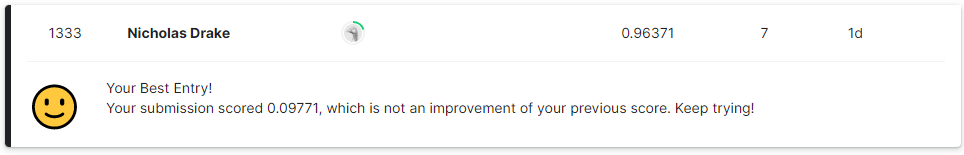